In [1]:
from ISLP import load_data 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.pipeline import make_pipeline

In [3]:
college_df = load_data("College")
college_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [39]:
college_df.shape

(777, 18)

In [4]:
college_df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


C:\Users\PC\AppData\Local\Temp\ipykernel_8932\4123162745.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(college_df.corr(), annot=True, cmap='coolwarm')


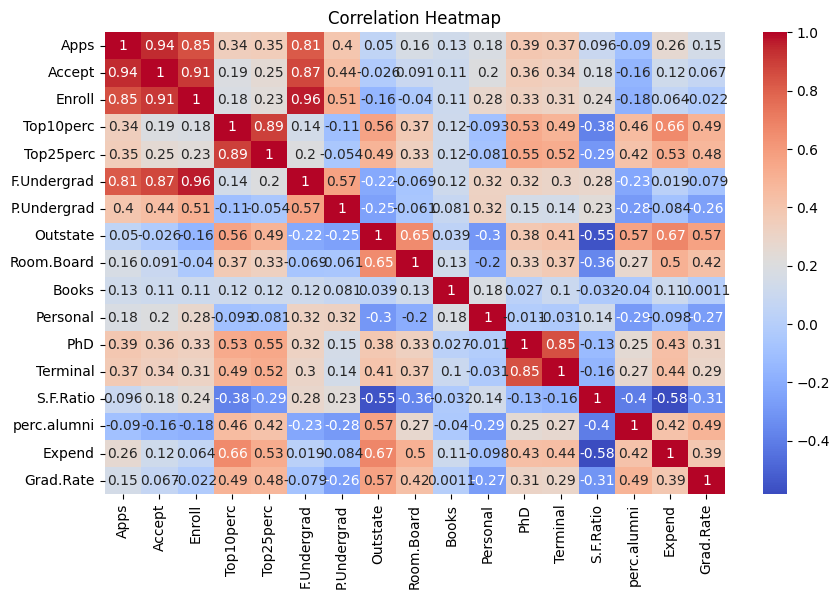

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(college_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
college_df["Private"] = np.where(college_df["Private"] == "Yes", 1, 0)
college_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### a)

In [7]:

X = college_df.drop(columns=["Apps"])
y = college_df["Apps"]

split = ShuffleSplit(n_splits=1, test_size=.2, random_state=22)

### b)

In [17]:
ols = LinearRegression()

ols_cv = cross_validate(
    ols,
    X,
    y,
    cv=split,
    scoring="neg_mean_squared_error",
    return_estimator=True
)

print(ols_cv)

{'fit_time': array([0.00200081]), 'score_time': array([0.00100136]), 'estimator': [LinearRegression()], 'test_score': array([-2092527.92351328])}


In [18]:
ols_cv["estimator"][0].coef_

array([-5.12946858e+02,  1.32115139e+00, -4.39958205e-01,  4.95465694e+01,
       -1.33458753e+01,  8.54873368e-02,  3.42292357e-02, -4.74613392e-02,
        1.75643228e-01,  3.29470045e-03,  2.16829951e-03, -9.36711685e+00,
       -2.54423903e+00,  7.39886738e+00, -8.83595870e+00,  5.74466452e-02,
        9.34920734e+00])

### c)

In [10]:
alphas = 10**np.linspace(8, -2, 100) / y.std()

In [27]:
ridge = RidgeCV(alphas=alphas, cv=5)

ridge_cv = cross_validate(
    ridge,
    X,
    y,
    cv=split,
    scoring="neg_mean_squared_error",
    return_estimator=True
)

print(ridge_cv)

{'fit_time': array([0.98631573]), 'score_time': array([0.00099993]), 'estimator': [RidgeCV(alphas=array([2.58384481e+04, 2.04765282e+04, 1.62272984e+04, 1.28598565e+04,
       1.01912163e+04, 8.07636466e+03, 6.40038087e+03, 5.07219239e+03,
       4.01962572e+03, 3.18548464e+03, 2.52444210e+03, 2.00057719e+03,
       1.58542321e+03, 1.25642078e+03, 9.95691984e+02, 7.89068869e+02,
       6.25323584e+02, 4.95558247e+02, 3.92721436e+02, 3.11225022e+02,
       2.46640507e+02, 1.95458384e+0...
       5.43874564e-04, 4.31011291e-04, 3.41569077e-04, 2.70687652e-04,
       2.14515335e-04, 1.69999734e-04, 1.34721882e-04, 1.06764788e-04,
       8.46092684e-05, 6.70513983e-05, 5.31370864e-05, 4.21102323e-05,
       3.33716389e-05, 2.64464531e-05, 2.09583618e-05, 1.66091433e-05,
       1.31624620e-05, 1.04310261e-05, 8.26640977e-06, 6.55098838e-06,
       5.19154626e-06, 4.11421162e-06, 3.26044235e-06, 2.58384481e-06]),
        cv=5)], 'test_score': array([-2091563.60441017])}


### d)

In [32]:
lasso = LassoCV(alphas=alphas, cv=5)

lasso_cv = cross_validate(
    lasso,
    X,
    y,
    cv=split,
    scoring="neg_mean_squared_error",
    return_estimator=True
)

print(lasso_cv)

{'fit_time': array([0.05851555]), 'score_time': array([0.00100136]), 'estimator': [LassoCV(alphas=array([2.58384481e+04, 2.04765282e+04, 1.62272984e+04, 1.28598565e+04,
       1.01912163e+04, 8.07636466e+03, 6.40038087e+03, 5.07219239e+03,
       4.01962572e+03, 3.18548464e+03, 2.52444210e+03, 2.00057719e+03,
       1.58542321e+03, 1.25642078e+03, 9.95691984e+02, 7.89068869e+02,
       6.25323584e+02, 4.95558247e+02, 3.92721436e+02, 3.11225022e+02,
       2.46640507e+02, 1.95458384e+0...
       5.43874564e-04, 4.31011291e-04, 3.41569077e-04, 2.70687652e-04,
       2.14515335e-04, 1.69999734e-04, 1.34721882e-04, 1.06764788e-04,
       8.46092684e-05, 6.70513983e-05, 5.31370864e-05, 4.21102323e-05,
       3.33716389e-05, 2.64464531e-05, 2.09583618e-05, 1.66091433e-05,
       1.31624620e-05, 1.04310261e-05, 8.26640977e-06, 6.55098838e-06,
       5.19154626e-06, 4.11421162e-06, 3.26044235e-06, 2.58384481e-06]),
        cv=5)], 'test_score': array([-2092527.92140662])}


In [21]:
lasso_cv["estimator"][0].alpha_

2.5838448050358095e-06

In [22]:
lasso_cv["estimator"][0].coef_

array([-5.12946822e+02,  1.32115139e+00, -4.39958206e-01,  4.95465693e+01,
       -1.33458753e+01,  8.54873377e-02,  3.42292361e-02, -4.74613411e-02,
        1.75643227e-01,  3.29469802e-03,  2.16830012e-03, -9.36711673e+00,
       -2.54423886e+00,  7.39886767e+00, -8.83595876e+00,  5.74466454e-02,
        9.34920731e+00])

### e)

In [34]:
pcr = make_pipeline(PCA(n_components="mle"), ols)

pcr_cv = cross_validate(
    pcr,
    X,
    y,
    cv=split,
    scoring="neg_mean_squared_error",
    return_estimator=True
)

print(pcr_cv)

{'fit_time': array([0.00499415]), 'score_time': array([0.00099826]), 'estimator': [Pipeline(steps=[('pca', PCA(n_components='mle')),
                ('linearregression', LinearRegression())])], 'test_score': array([-2082853.63991157])}


### f)

In [57]:
pls = PLSRegression()

grid_search = GridSearchCV(
    estimator=pls,
    param_grid={"n_components": range(1, X.shape[1] - 1)},
    cv=5,
    scoring="neg_mean_squared_error"
)

grid_search.fit(X, y)

grid_search.best_score_

-1485607.0808813423